# Assignment 13: Akash

## Setup data and cluster it using the new data sets (clipped properly)

I discovered that we had been working with a data set that was not fully "clipped". i.e. we had not cut off enough of the edges of the data set to remove areas where there were no voxels. Specifically, our y bound needed to change to 3000.

This has led to clusters being different and regressions, as we see below.

Interestingly... while the BIC looks like it is 8 clusters, if we look at number 5, the eight cluster suggests there are actually 9 clusters...

... so the spiral continues.

In [95]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import urllib2
import scipy.stats as stats

np.set_printoptions(precision=3, suppress=True)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:] # don't want first row (labels)

# chopping data based on thresholds on x and y coordinates
x_bounds = (409, 3529)
y_bounds = (1564, 3124)

def check_in_bounds(row, x_bounds, y_bounds):
    if row[0] < x_bounds[0] or row[0] > x_bounds[1]:
        return False
    if row[1] < y_bounds[0] or row[1] > y_bounds[1]:
        return False
    if row[3] == 0:
        return False
    
    return True

indices_in_bound, = np.where(np.apply_along_axis(check_in_bounds, 1, csv,
                                                 x_bounds, y_bounds))
data_thresholded = csv[indices_in_bound]
n = data_thresholded.shape[0]


def synapses_over_unmasked(row):
    s = (row[4]/row[3])*(64**3)
    return [row[0], row[1], row[2], s]

syn_unmasked = np.apply_along_axis(synapses_over_unmasked, 1, data_thresholded)
syn_normalized = syn_unmasked

############################################# NEW CLIPPED DATA
indices_in_bound, = np.where(np.apply_along_axis(check_in_bounds, 1, syn_unmasked,
                                                 x_bounds, (1564,3000)))

syn_clipped = syn_unmasked[indices_in_bound]


print 'end setup'

end setup


## 1) Run BIC on the new clipped cluster

testing for cluster: 1
testing for cluster: 2
testing for cluster: 3
testing for cluster: 4
testing for cluster: 5
testing for cluster: 6
testing for cluster: 7
testing for cluster: 8
testing for cluster: 9
testing for cluster: 10
testing for cluster: 11


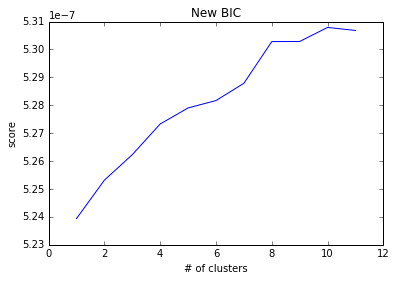

done


In [96]:

import sklearn.mixture as mixture
max_clusters = 12
bic = np.array([])
i = np.array(range(1, max_clusters))
for idx in range(1, max_clusters):
    print 'testing for cluster: ' + str(idx) 
    gmm = mixture.GMM(n_components=idx, n_iter=1000, covariance_type='diag', random_state=1)
    gmm.fit(syn_clipped)
    bic = np.append(bic, gmm.bic(syn_clipped))
    
fig = plt.figure(2)
ay = fig.gca()
plt.plot(i, 1.0/bic)
ay.set_title('New BIC')
ay.set_ylabel('score')
ay.set_xlabel('# of clusters')


plt.show()
print 'done'

## Set up cluster for 4 regions

In [87]:
import sklearn.mixture as mixture

n_clusters = 4
gmm = mixture.GMM(n_components=n_clusters, n_iter=1000, covariance_type='diag')
labels = gmm.fit_predict(syn_clipped)
clusters = []
for l in range(n_clusters):
    a = np.where(labels == l)
    clusters.append(syn_clipped[a,:])

print len(clusters)
print clusters[0].shape


4
(1L, 10218L, 4L)


## 2) Visualize clusters individually, scaled and cleaned up graph (ext. 12.1)

This is very different from our last homework of visualizing the cluster. However it does look like our k means cluster


Visualization of new cluster using 4 clusters: 1


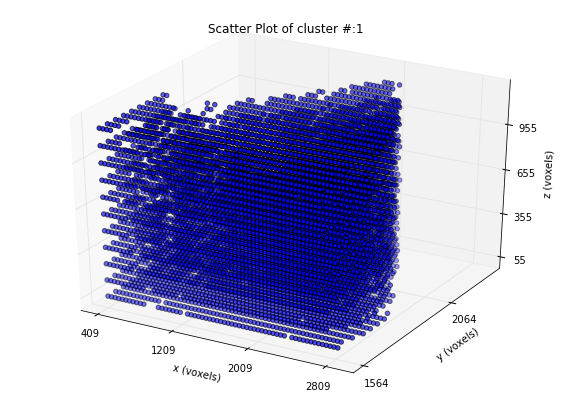


Visualization of new cluster using 4 clusters: 2


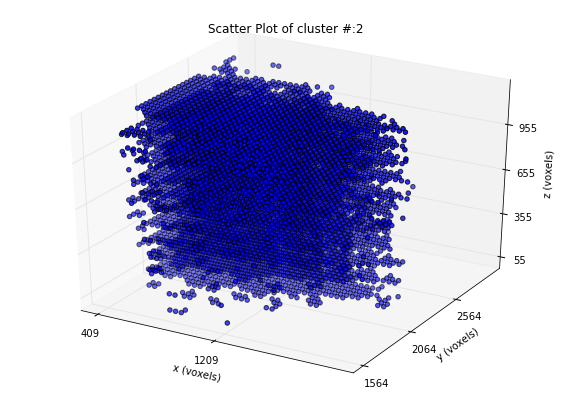


Visualization of new cluster using 4 clusters: 3


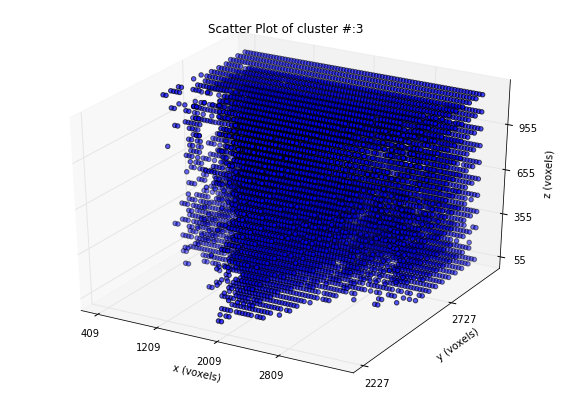


Visualization of new cluster using 4 clusters: 4


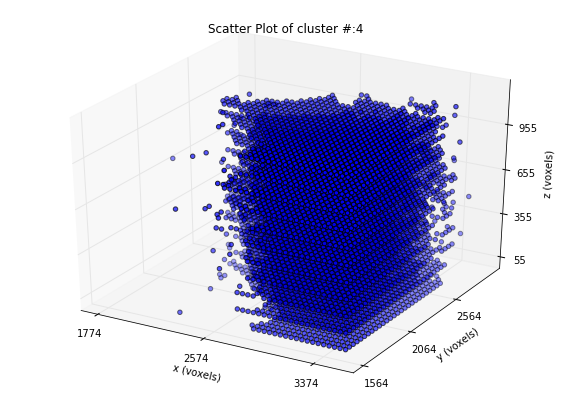

In [66]:
from mpl_toolkits.mplot3d import Axes3D
counter = 0
for cluster in clusters:
    s = cluster.shape
    cluster = cluster.reshape((s[1], s[2]))
    counter += 1
    print 
    print'Visualization of new cluster using 4 clusters: ' + str(counter)
    X = cluster[:, (0,1,2)] # x,y,z
    Y = cluster[:,-1] # syn/unmasked from spike
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca(projection='3d')
    ax.view_init()
    ax.dist = 10  # distance
    ax.set_xlabel('x (voxels)')
    ax.set_ylabel('y (voxels)')
    ax.set_zlabel('z (voxels)')
    title = 'Scatter Plot of cluster #:' + str(counter)
    ax.set_title(title)
    ax.set_xticks(np.arange(min(cluster[:,0]), max(cluster[:,0])+1, 800))
    ax.set_yticks(np.arange(min(cluster[:,1]), max(cluster[:,1])+1, 500))
    ax.set_zticks(np.arange(min(cluster[:,2]), max(cluster[:,2])+1, 300))

    ax.scatter(
        cluster[:, 0], cluster[:, 1], cluster[:, 2],
        #c = counter
    )  # data
      # marker colour
                

    plt.show()  


## 3) Lets try another visualization of all of it together

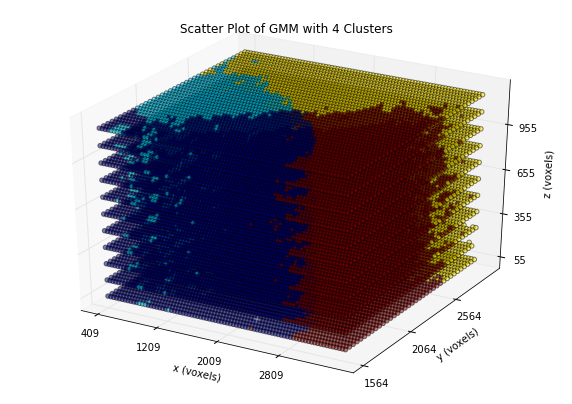

In [67]:
fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
ax.view_init()
ax.dist = 10  # distance
ax.set_xlabel('x (voxels)')
ax.set_ylabel('y (voxels)')
ax.set_zlabel('z (voxels)')
ax.set_title('Scatter Plot of GMM with 4 Clusters')
ax.set_xticks(np.arange(min(syn_clipped[:,0]), max(syn_clipped[:,0])+1, 800))
ax.set_yticks(np.arange(min(syn_clipped[:,1]), max(syn_clipped[:,1])+1, 500))
ax.set_zticks(np.arange(min(syn_clipped[:,2]), max(syn_clipped[:,2])+1, 300))

ax.scatter(
           syn_clipped[:, 0], syn_clipped[:, 1], syn_clipped[:, 2],  # data
           c=labels,  # marker colour
           alpha=.5
    )

plt.show()


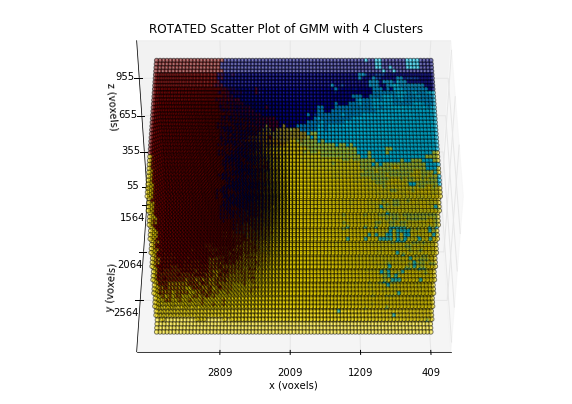

In [68]:
fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
ax.view_init(45, 90)
ax.dist = 10  # distance
ax.set_xlabel('x (voxels)')
ax.set_ylabel('y (voxels)')
ax.set_zlabel('z (voxels)')
ax.set_title('ROTATED Scatter Plot of GMM with 4 Clusters')
ax.set_xticks(np.arange(min(syn_clipped[:,0]), max(syn_clipped[:,0])+1, 800))
ax.set_yticks(np.arange(min(syn_clipped[:,1]), max(syn_clipped[:,1])+1, 500))
ax.set_zticks(np.arange(min(syn_clipped[:,2]), max(syn_clipped[:,2])+1, 300))

ax.scatter(
           syn_clipped[:, 0], syn_clipped[:, 1], syn_clipped[:, 2],  # data
           c=labels,  # marker colour
           alpha=.5
    )

plt.show()

## 4) Are the distributions for the new data different from before clipping?

Yes, yes they are... Not surprising, but its definetly noticble that the huge spike of zeros in the previous distribution for cluster 4 is no longer present 


Working on cluster: 1
Done with cluster

Working on cluster: 2
Done with cluster

Working on cluster: 3
Done with cluster

Working on cluster: 4
Done with cluster


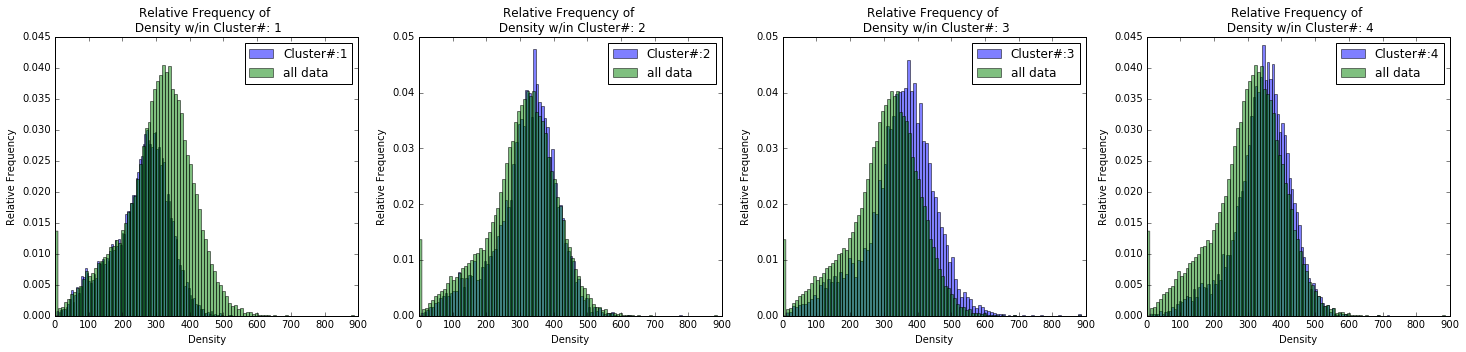

In [88]:
counter = 0
fig, axs = plt.subplots(1,4,figsize=(25,5))
for cluster in clusters:
    s = cluster.shape
    cluster = cluster.reshape((s[1], s[2]))
    counter += 1
    print 
    print'Working on cluster: ' + str(counter)
   
    
    weights = np.ones_like(cluster[:,-1])/len(cluster[:,-1])
    weights2 = np.ones_like(syn_unmasked[:,-1])/len(syn_unmasked[:,-1])
    
    figure = plt.figure()
    axs[counter-1].hist(cluster[:,-1], bins = 100, alpha = 0.5, weights = weights, label = 'Cluster#:'+str(counter))
    axs[counter-1].hist(syn_unmasked[:,-1], bins = 100, alpha = 0.5, weights = weights2, label = 'all data')
    axs[counter-1].set_title('Relative Frequency of \n Density w/in Cluster#: '+ str(counter))
    axs[counter-1].set_xlabel('Density')
    axs[counter-1].set_ylabel('Relative Frequency')
    axs[counter-1].legend()
   
   
 
    print "Done with cluster"
    
plt.show()

## 5) Set up and visualize for 8 clusters, as the BIC suggests

In [89]:
n_clusters = 8
gmm = mixture.GMM(n_components=n_clusters, n_iter=1000, covariance_type='diag')
labels = gmm.fit_predict(syn_clipped)
clusters = []
for l in range(n_clusters):
    a = np.where(labels == l)
    clusters.append(syn_clipped[a,:])

print len(clusters)
print clusters[0].shape

8
(1L, 5647L, 4L)


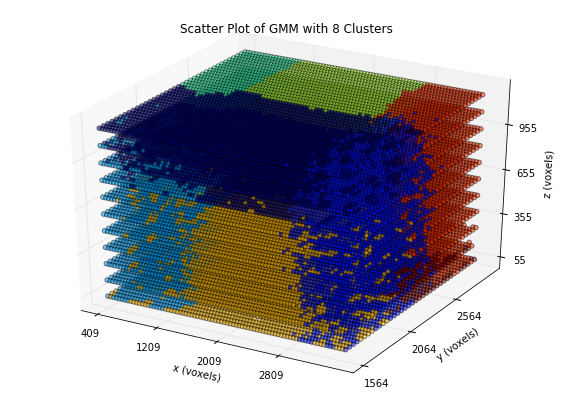

In [85]:
fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
ax.view_init()
ax.dist = 10  # distance
ax.set_xlabel('x (voxels)')
ax.set_ylabel('y (voxels)')
ax.set_zlabel('z (voxels)')
ax.set_title('Scatter Plot of GMM with 8 Clusters')
ax.set_xticks(np.arange(min(syn_clipped[:,0]), max(syn_clipped[:,0])+1, 800))
ax.set_yticks(np.arange(min(syn_clipped[:,1]), max(syn_clipped[:,1])+1, 500))
ax.set_zticks(np.arange(min(syn_clipped[:,2]), max(syn_clipped[:,2])+1, 300))

ax.scatter(
           syn_clipped[:, 0], syn_clipped[:, 1], syn_clipped[:, 2],  # data
           c=labels,  # marker colour
           alpha=.5
    )

plt.show()

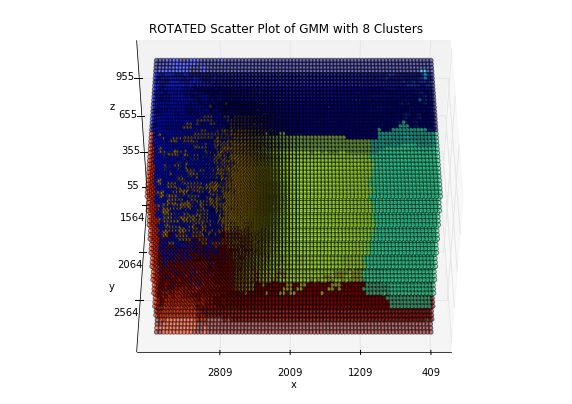

In [86]:
fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
ax.view_init(45, 90)
ax.dist = 10  # distance
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('ROTATED Scatter Plot of GMM with 8 Clusters')
ax.set_xticks(np.arange(min(syn_clipped[:,0]), max(syn_clipped[:,0])+1, 800))
ax.set_yticks(np.arange(min(syn_clipped[:,1]), max(syn_clipped[:,1])+1, 500))
ax.set_zticks(np.arange(min(syn_clipped[:,2]), max(syn_clipped[:,2])+1, 300))

ax.scatter(
           syn_clipped[:, 0], syn_clipped[:, 1], syn_clipped[:, 2],  # data
           c=labels,  # marker colour
           alpha=.5
    )

plt.show()

## 6) Cool, lets look at the distribution for 8 clusters


Working on cluster: 1


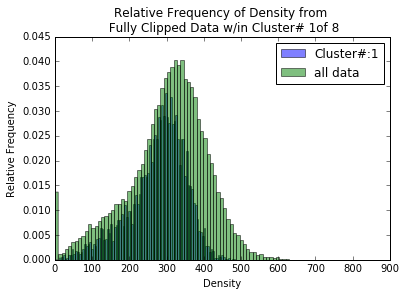

Done with cluster

Working on cluster: 2


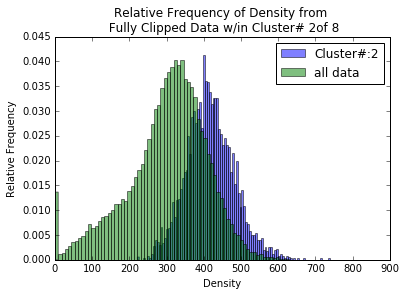

Done with cluster

Working on cluster: 3


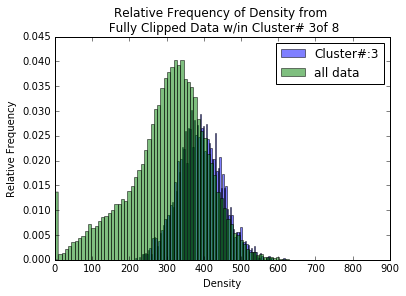

Done with cluster

Working on cluster: 4


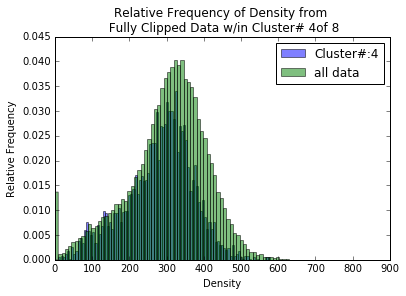

Done with cluster

Working on cluster: 5


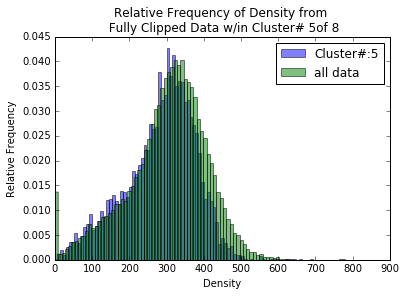

Done with cluster

Working on cluster: 6


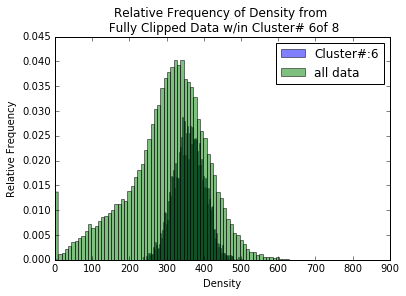

Done with cluster

Working on cluster: 7


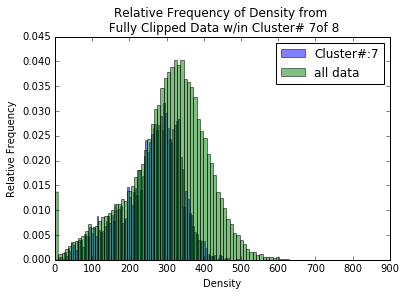

Done with cluster

Working on cluster: 8


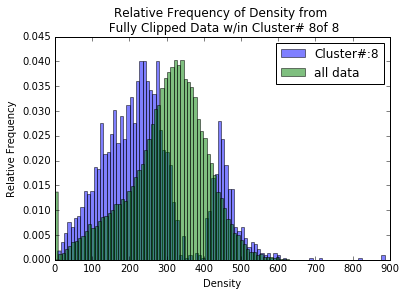

Done with cluster


In [107]:
counter = 0
fig = plt.figure(figsize=(10, 7))
for cluster in clusters:
    s = cluster.shape
    cluster = cluster.reshape((s[1], s[2]))
    counter += 1
    print 
    print'Working on cluster: ' + str(counter)
   
    
    weights = np.ones_like(cluster[:,-1])/len(cluster[:,-1])
    weights2 = np.ones_like(syn_unmasked[:,-1])/len(syn_unmasked[:,-1])
    
    figure = plt.figure()
    plt.hist(cluster[:,-1], bins = 100, alpha = 0.5, weights = weights, label = 'Cluster#:'+str(counter))
    plt.hist(syn_unmasked[:,-1], bins = 100, alpha = 0.5, weights = weights2, label = 'all data')
    plt.title('Relative Frequency of Density from \n Fully Clipped Data w/in Cluster# '+ str(counter) + 'of 8')
    plt.xlabel('Density')
    plt.ylabel('Relative Frequency')
    plt.legend()
    plt.show()  
   
 
    print "Done with cluster"
    


## and now we see in the final histogram... there actually may be 9 clusters? 